In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import corner

In [2]:
#For plot formatting
size = 13
plt.rc('font', size=size)          
plt.rc('axes', titlesize=size)     
plt.rc('axes', labelsize=size)   
plt.rc('xtick', labelsize=size)   
plt.rc('ytick', labelsize=size)    
plt.rc('legend', fontsize=size)    
plt.rc('figure', titlesize=size) 

tick_length_major = 7
tick_length_minor = 3
tick_width = 1

A_max = -2
A_min = -5 
beta_max = 8.0
beta_min = 3.0
num_classes=100

plot = True

In [3]:
path_list = ["results_augment_final","results_MCMC_final","results_combined_final"]

In [4]:
df = pd.read_pickle(f"{path_list[-1]}/UNN_Real_data_results")
names = [
    "J0029-0055",
    "J0037-0942",
    "J0252+0039",
    "J0330-0020",
    "J0728+3835",
    "J0737+3216",
    "J0903+4116",
    "J0959+0410",
    "J1112+0826",
    "J1204+0358",
    "J1250+0523",
    "J1306+0600",
    "J1313+4615",
    "J1402+6321",
    "J1531-0105",
    "J1621+3931",
    "J1627-0053",
    "J1630+4520",
    "J1636+4707",
    "J2238-0754",
    "J2300+0022",
    "J2303+1422",
    "J2343-0030",
]

In [5]:
def plot(A_pred_real,beta_pred_real,num=0):
    
    A_median_real = []
    A_width_real_left = []
    A_width_real_right = []

    beta_median_real = []
    beta_width_real_left = []
    beta_width_real_right = []

    for i in range(len(A_pred_real)):
        x_A = np.random.choice(np.linspace(A_min,A_max,num_classes), 1_000_000, p=A_pred_real[i])
        median = np.quantile(x_A,0.5)
        left = np.quantile(x_A,0.5-.638/2)
        right = np.quantile(x_A,0.5+.638/2)

        A_median_real.append(median)
        A_width_real_left.append(abs(median-left))
        A_width_real_right.append(abs(median-right))

        x_beta = np.random.choice(np.linspace(beta_min,beta_max,num_classes), 1_000_000, p=beta_pred_real[i])
        median = np.quantile(x_beta,0.5)
        left = np.quantile(x_beta,0.5-.638/2)
        right = np.quantile(x_beta,0.5+.638/2)

        beta_median_real.append(median)
        beta_width_real_left.append(abs(median-left))
        beta_width_real_right.append(abs(median-right)) 
    
    plt.figure(figsize=(26., 20.))
    
    num_rows = 10 
    num_cols = 5 

    row_height = 4
    space_height = 1

    num_sep_rows = lambda x: int((x-1)/2)
    grid = (row_height*num_rows + space_height*num_sep_rows(num_rows), num_cols)

    ax_list = []

    for ind_row in range(num_rows):
        for ind_col in range(num_cols):
            grid_row = row_height*ind_row + space_height*num_sep_rows(ind_row+1)
            grid_col = ind_col

            ax_list += [plt.subplot2grid(grid, (grid_row, grid_col), rowspan=row_height)]

    plt.subplots_adjust(bottom=-0.1, top=1.2, hspace=100000, wspace=0.13)

    j=0
    while j < num_rows//2:
        for k in range(num_cols):
            i = 2*num_cols*j+k
            m = num_cols*j+k

            try:
                name = names[m]

                xaxis = np.linspace(A_min, A_max,num_classes)
                ax_list[i].plot(xaxis,A_pred_real[m])

                ax_list[i].axvline(A_median_real[m])
                ax_list[i].axvline(A_median_real[m]-A_width_real_left[m],linestyle='--')
                ax_list[i].axvline(A_median_real[m]+A_width_real_right[m],linestyle='--')        


                width = 0.05

                max_prob = 0.05

                ax_list[i].text(A_min+1,1.1*max_prob, name, fontsize = 22,color='black')
                ax_list[i].set_xlabel(r'$\log_{10}(\sigma_{\delta\psi}^2)$',fontsize=17)

                xaxis = np.linspace(beta_min, beta_max,num_classes)
                ax_list[i+num_cols].plot(xaxis,beta_pred_real[m])

                ax_list[i+num_cols].axvline(beta_median_real[m])
                ax_list[i+num_cols].axvline(beta_median_real[m]-beta_width_real_left[m],linestyle='--')
                ax_list[i+num_cols].axvline(beta_median_real[m]+beta_width_real_right[m],linestyle='--') 

                ax_list[i+num_cols].set_xlabel(r'$\beta$',fontsize=17)

                ax_list[i].set_ylim(0,max_prob)
                ax_list[i].set_xlim(A_min,A_max)
                ax_list[i+num_cols].set_ylim(0,max_prob)
                ax_list[i+num_cols].set_xlim(beta_min,beta_max)
                ax_list[i].minorticks_on()
                ax_list[i].tick_params(which='major',direction='in',top=True, right=True,length=tick_length_major,width=tick_width)
                ax_list[i].tick_params(which='minor',direction='in',top=True, right=True,length=tick_length_minor,width=tick_width)

                ax_list[i+num_cols].minorticks_on()
                ax_list[i+num_cols].tick_params(which='major',direction='in',top=True, right=True,length=tick_length_major,width=tick_width)
                ax_list[i+num_cols].tick_params(which='minor',direction='in',top=True, right=True,length=tick_length_minor,width=tick_width)

                if k == 0:
                    ax_list[i].set_ylabel('prob. density',fontsize=20)
                    ax_list[i+num_cols].set_ylabel('prob. density',fontsize=20)
                else:
                    ax_list[i].set_yticklabels([])
                    ax_list[i+num_cols].set_yticklabels([])
            except:
                ax_list[i].remove()
                ax_list[i+num_cols].remove()

        j+=1
        
    plt.savefig(f'results/probs2_DataSet_{num}.pdf',bbox_inches='tight')
    plt.show()
    

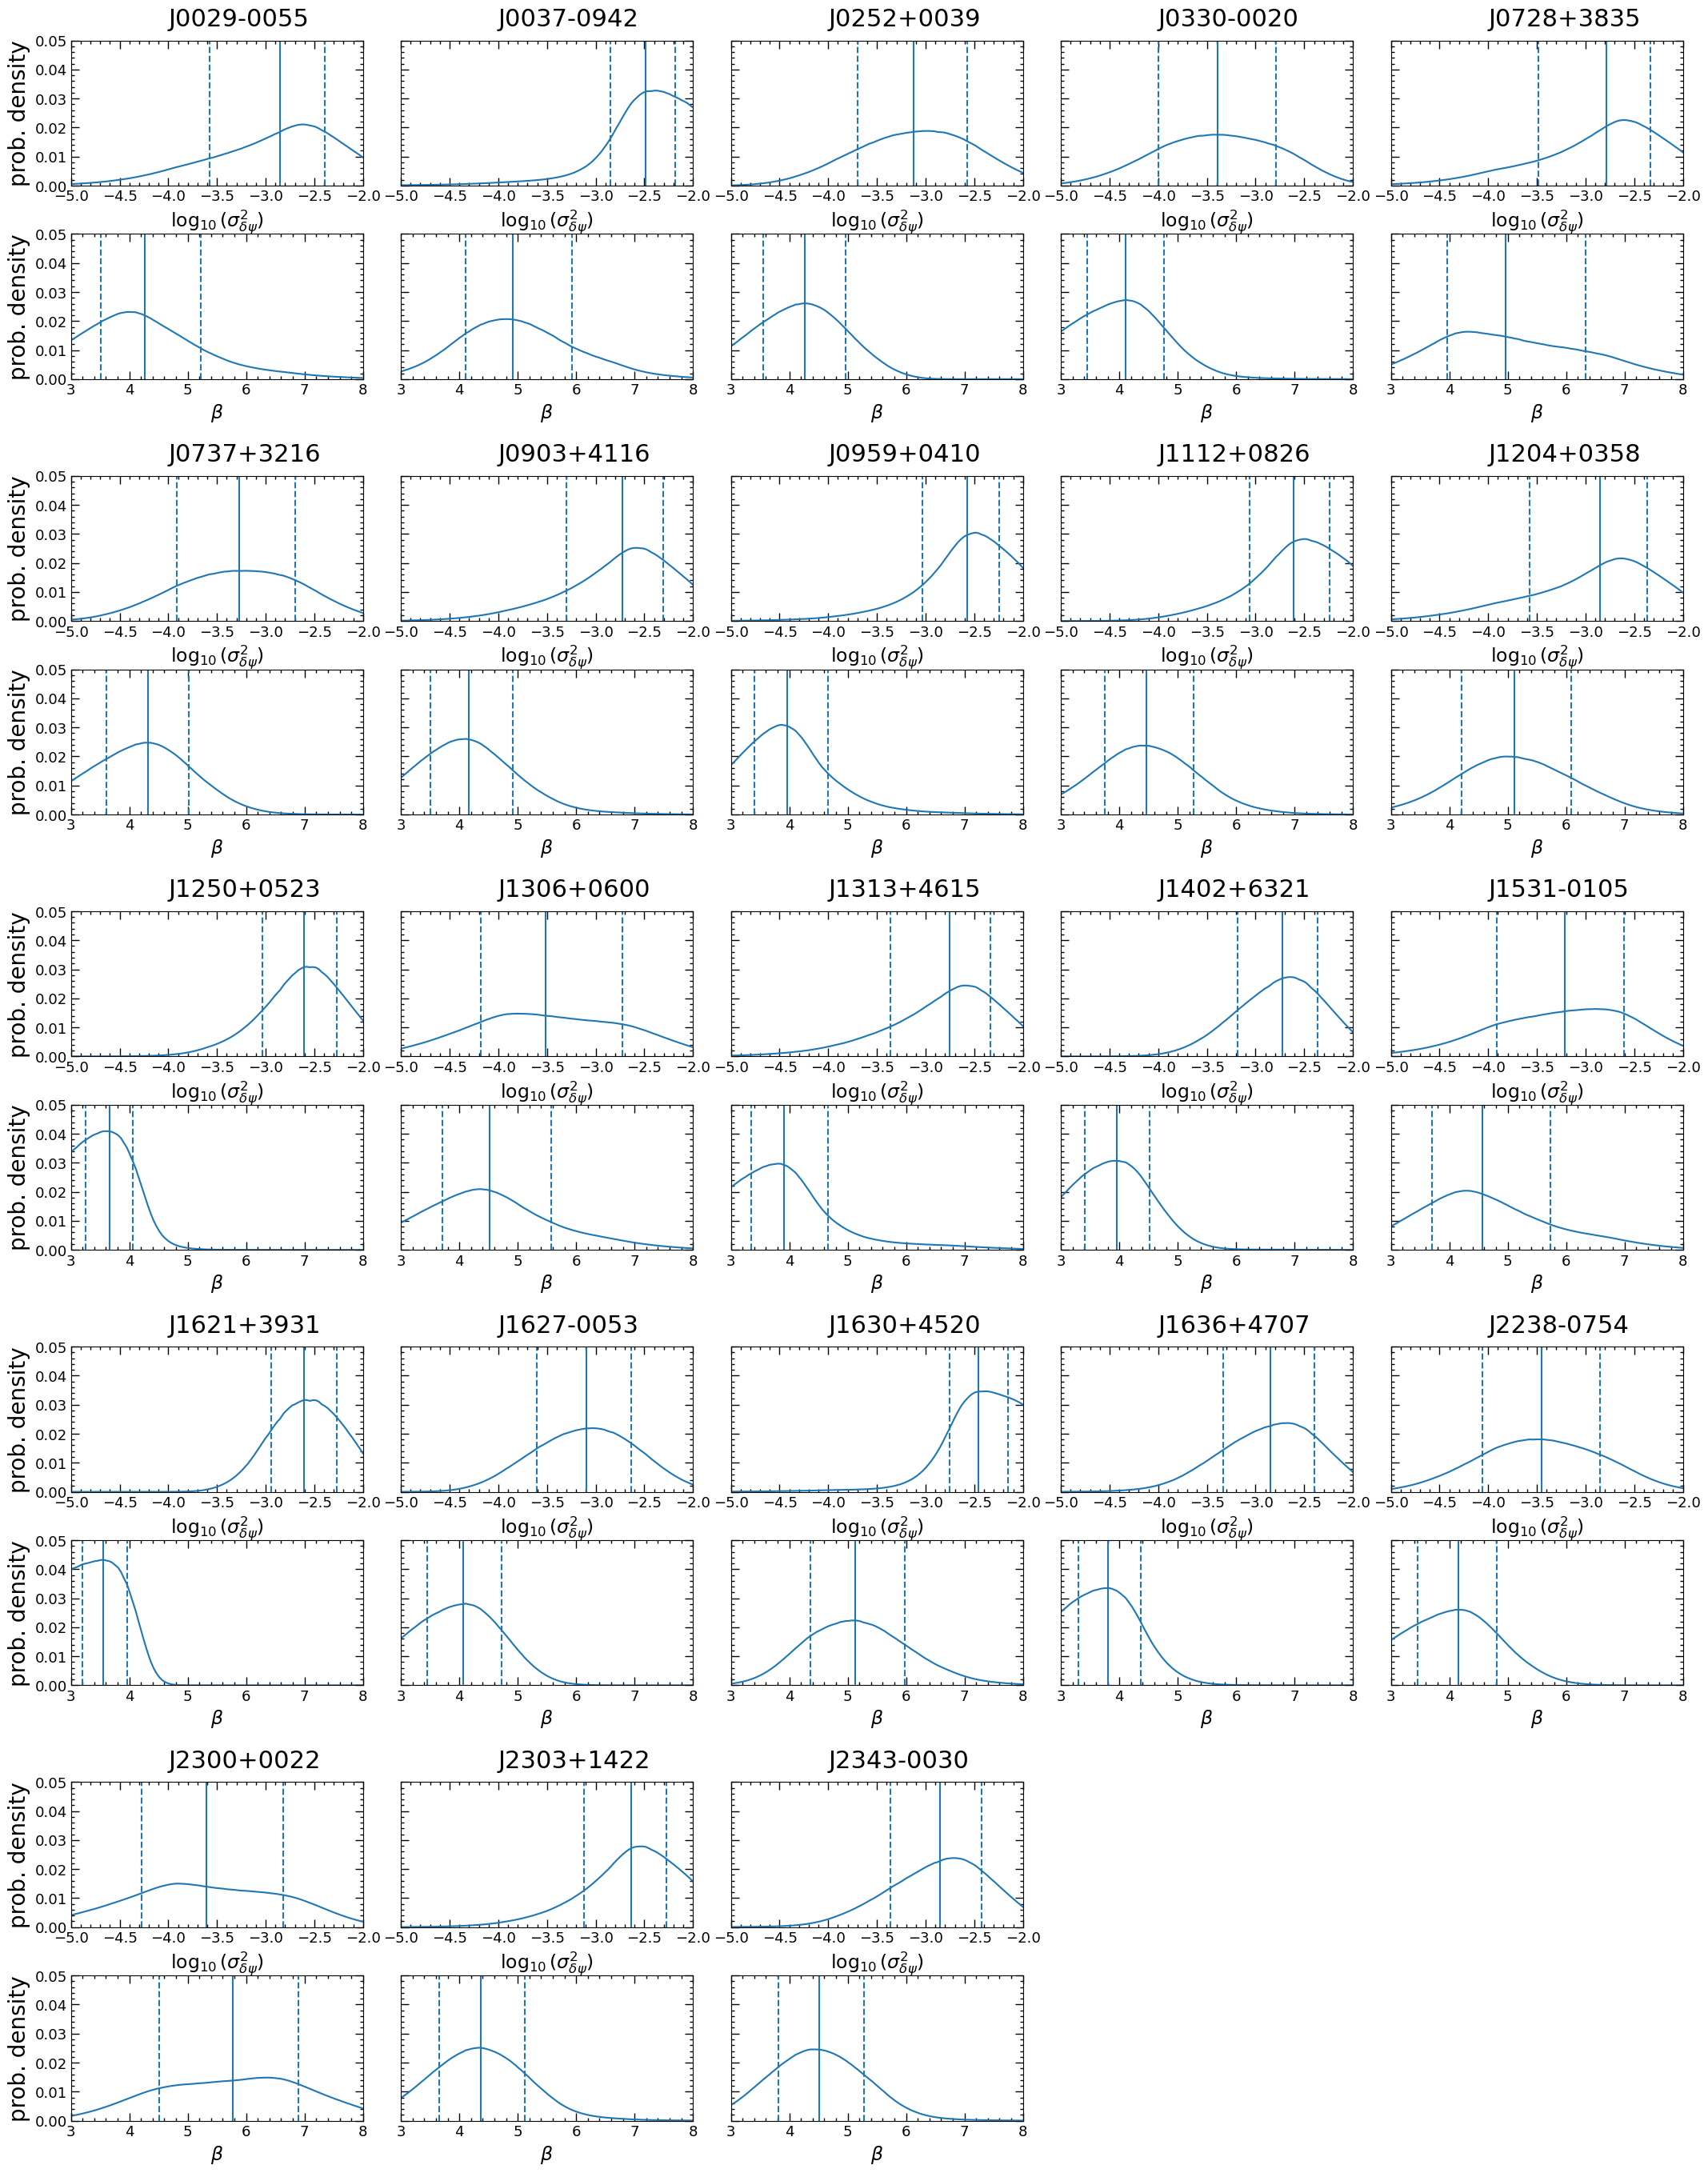

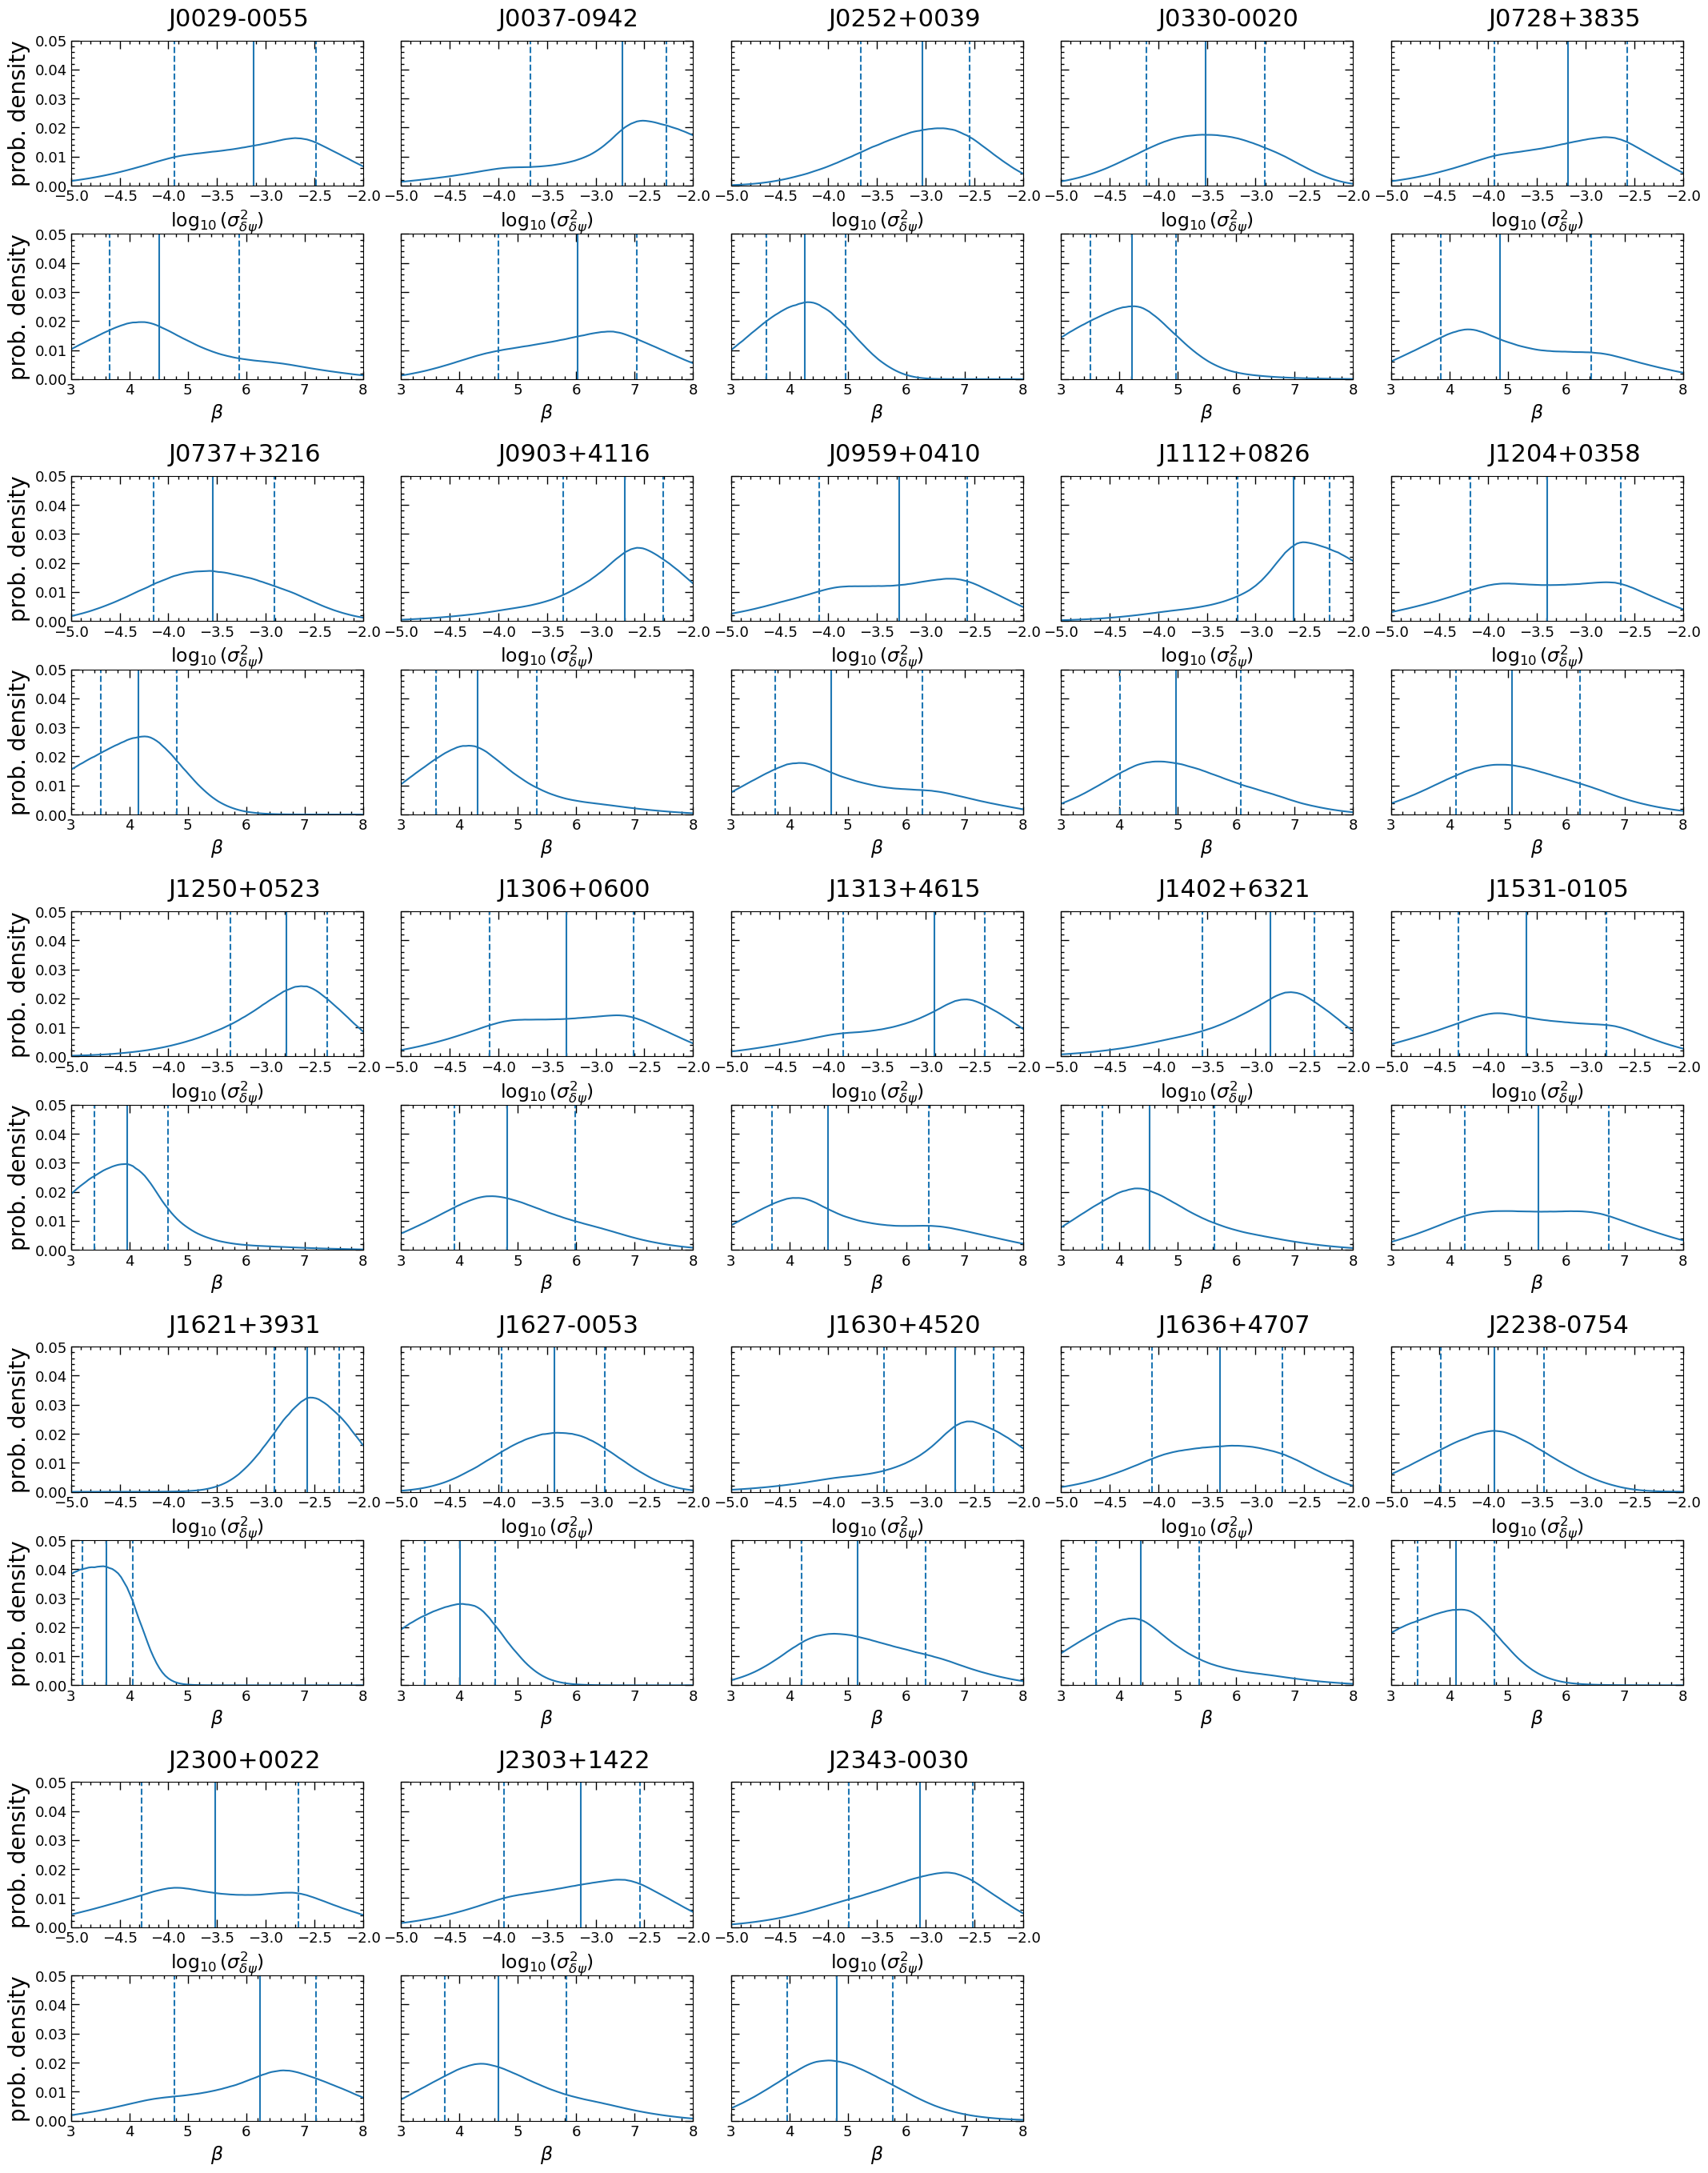

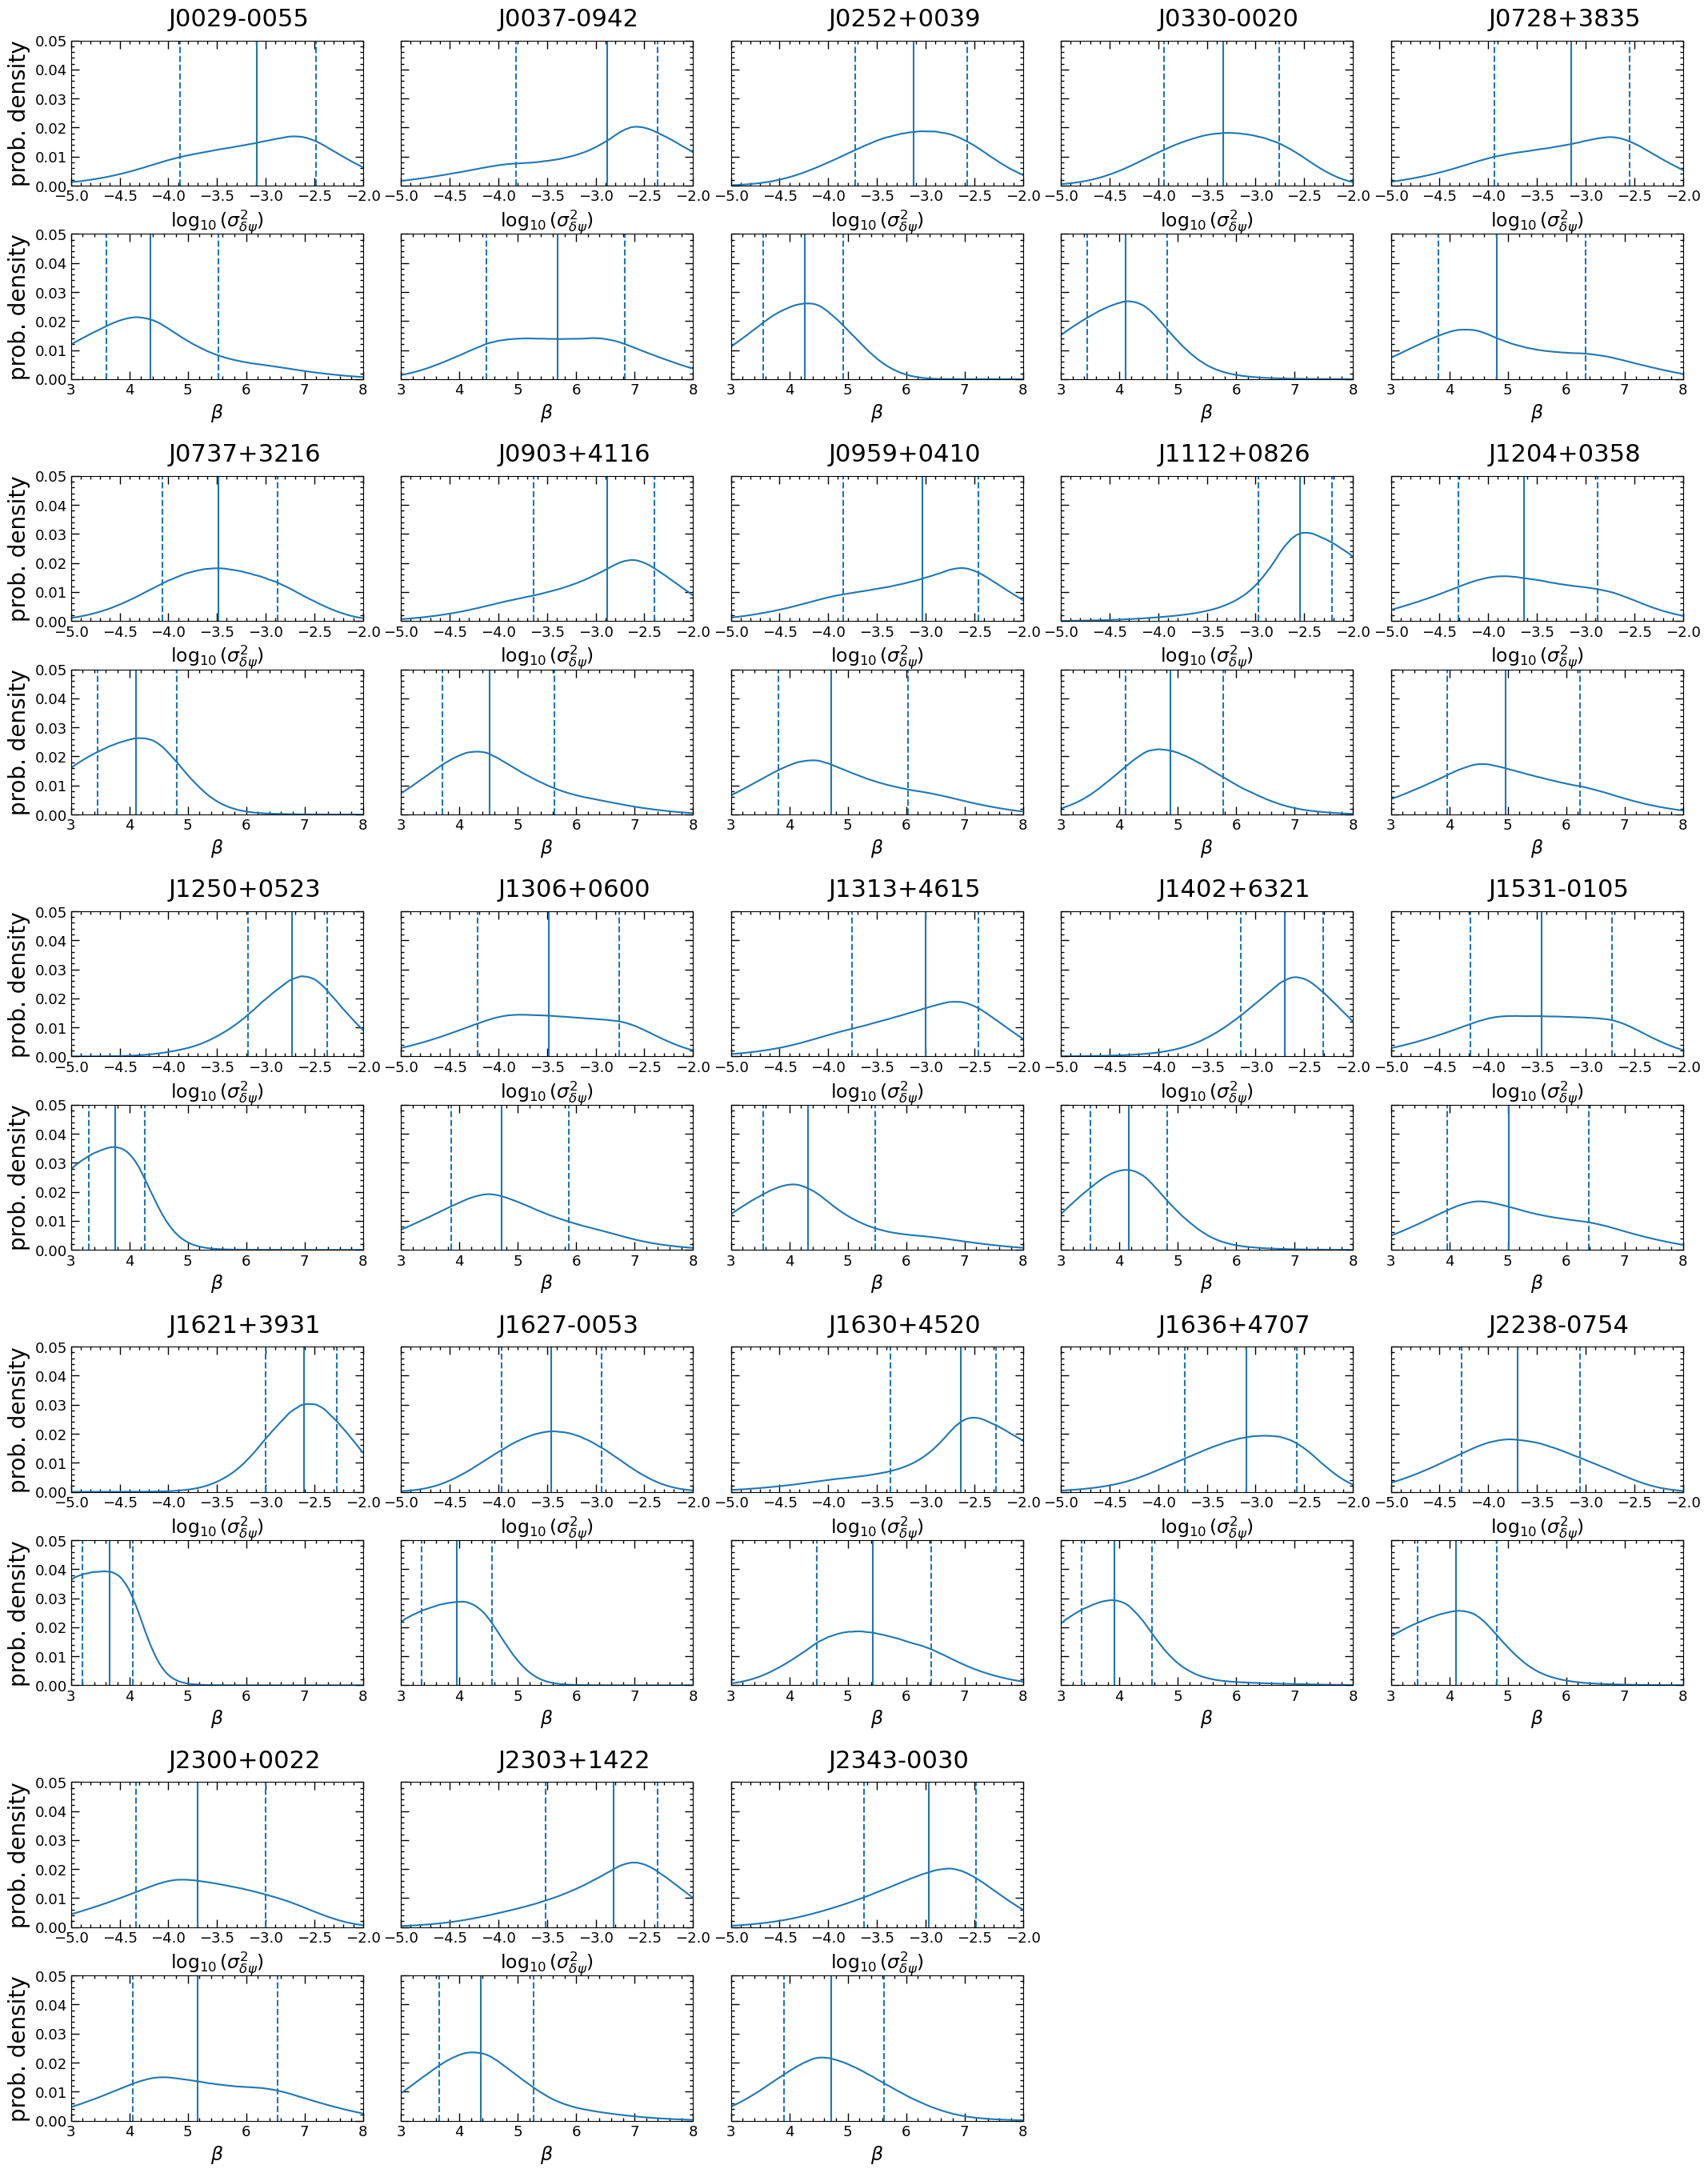

In [6]:
for j, path in enumerate(path_list):
    A_pred_real_comb = np.load(f"{path}/A_pred_real.npy")
    beta_pred_real_comb = np.load(f"{path}/beta_pred_real.npy")
    plot(A_pred_real_comb,beta_pred_real_comb,num=j)